# Получение данных, предварительная подготовка, построение модели

In [1]:
from __future__ import print_function

#import keras
from tensorflow.keras import optimizers
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (16.0, 9.0)
import numpy as np

np.random.seed(1)

Using TensorFlow backend.


Описание данных можно найти по [ссылке:](https://www.cs.toronto.edu/~kriz/cifar.html)

In [2]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 12s 0us/step


Итак, перед нами $50000$ картинок в формате RGB размера $32 \times 32$ для тренирвоки и $10000$ — для теста

In [3]:
print('X_Train:\t', X_train.shape)
print('y_train:\t', y_train.shape)

print('X_test:\t\t', X_test.shape)
print('y_test:\t\t', y_test.shape)

input_shape = X_train[0].shape
print('\nInput Shape:\t', input_shape)

X_Train:	 (50000, 32, 32, 3)
y_train:	 (50000, 1)
X_test:		 (10000, 32, 32, 3)
y_test:		 (10000, 1)

Input Shape:	 (32, 32, 3)


Посмотрим на какие-то случайные изображения и метки их классов


 [6]


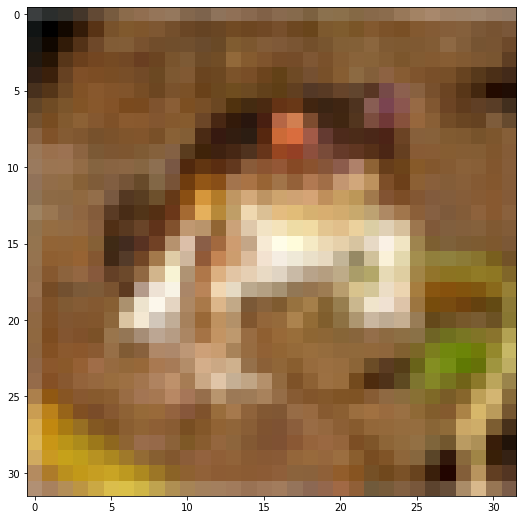


 [9]


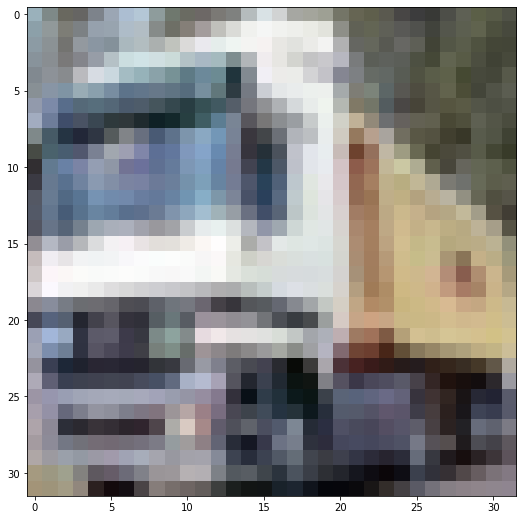


 [9]


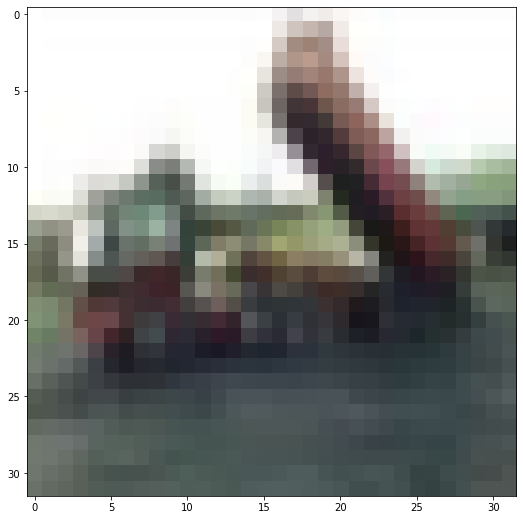


 [4]


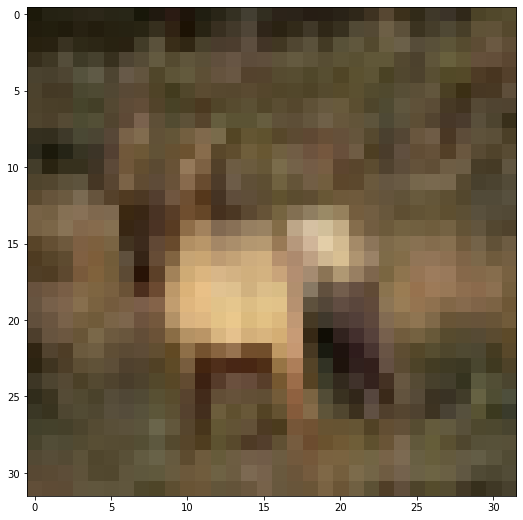


 [1]


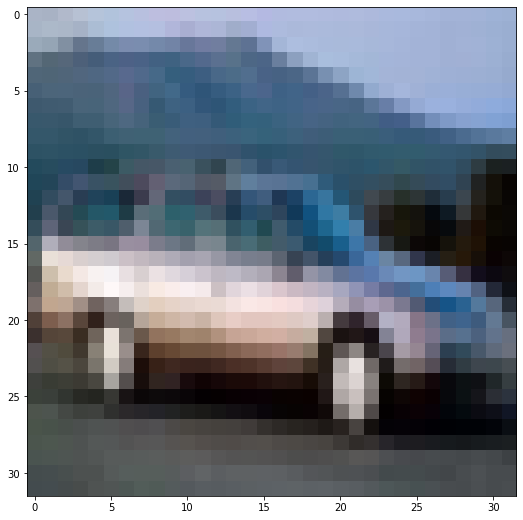

In [4]:
for i in range(0, 5):
    print('\n', y_train[i])
    plt.imshow(X_train[i])
    plt.show()

Нормализируем наши данные, приведя значения в матричном представлении изображений к диапазону $[0, 1]$

In [5]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')


X_train /= 255
X_test /= 255

Проверим, что все ОК


 [6]


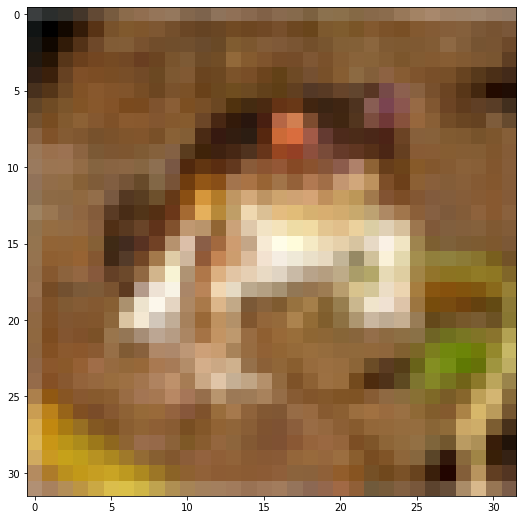


 [9]


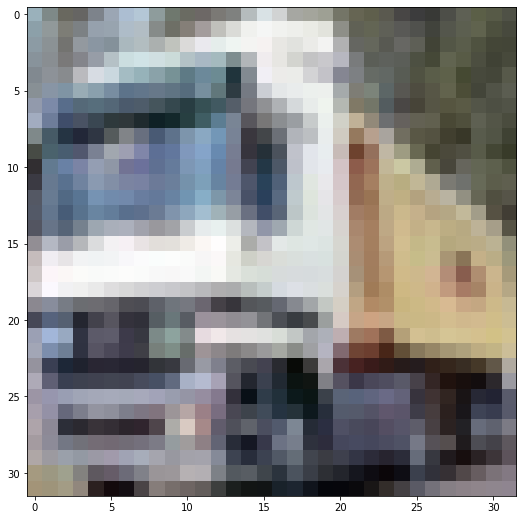


 [9]


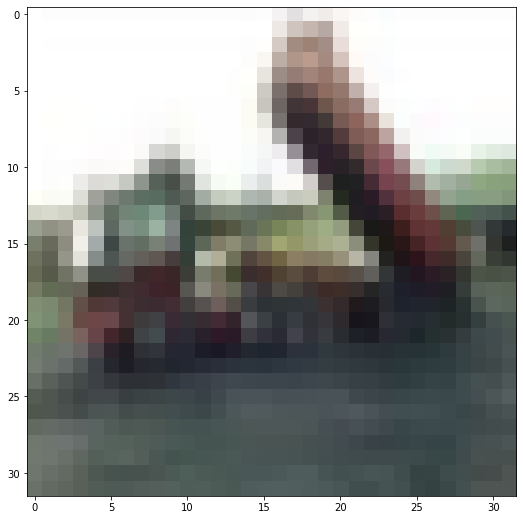


 [4]


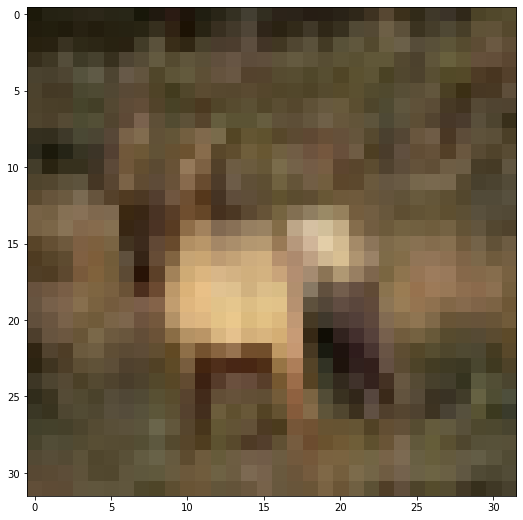


 [1]


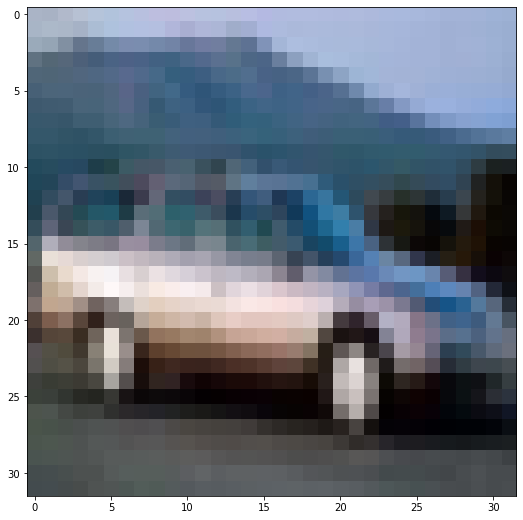

In [6]:
for i in range(0, 5):
    print('\n', y_train[i])
    plt.imshow(X_train[i])
    plt.show()

Теперь зададим нашу модель. Пока не будем особо вникать в детали свертки.

In [7]:
def get_model():
    
    model = Sequential()
    
    model.add(Conv2D(filters=32, kernel_size=(3,3), padding='same', input_shape=input_shape, activation='relu'))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    model.add(Flatten())
    
    model.add(Dense(units=512, activation='relu'))
    model.add(Dense(units=128, activation='relu'))
    model.add(Dense(units=32, activation='relu'))
    model.add(Dense(units=10, activation='relu'))
    
    model.add(Dense(units=10, activation='softmax'))
    
    print('Model initialized. Please compile before training.')
    
    return model

In [8]:
batch_size = 128
epochs = 100

# SGD

In [9]:
model_sgd_plain = get_model()

Model initialized. Please compile before training.


2021-11-18 10:29:14.286508: I tensorflow/core/platform/cpu_feature_guard.cc:145] This TensorFlow binary is optimized with Intel(R) MKL-DNN to use the following CPU instructions in performance critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in non-MKL-DNN operations, rebuild TensorFlow with the appropriate compiler flags.
2021-11-18 10:29:14.286798: I tensorflow/core/common_runtime/process_util.cc:115] Creating new thread pool with default inter op setting: 16. Tune using inter_op_parallelism_threads for best performance.


In [10]:
model_sgd_plain.summary()
sgd_plain = optimizers.SGD()
model_sgd_plain.compile(loss = 'sparse_categorical_crossentropy', optimizer = sgd_plain, metrics=['accuracy'])
history_sgd_plain = model_sgd_plain.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, validation_data = (X_test, y_test), shuffle=True)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)             

50000/50000 [==============================] - 52s 1ms/step - loss: 0.3744 - accuracy: 0.8686 - val_loss: 1.4239 - val_accuracy: 0.6179
Epoch 43/100
50000/50000 [==============================] - 53s 1ms/step - loss: 0.3464 - accuracy: 0.8800 - val_loss: 1.3299 - val_accuracy: 0.6486
Epoch 44/100
50000/50000 [==============================] - 53s 1ms/step - loss: 0.3175 - accuracy: 0.8896 - val_loss: 1.4619 - val_accuracy: 0.6303
Epoch 45/100
50000/50000 [==============================] - 52s 1ms/step - loss: 0.2868 - accuracy: 0.9018 - val_loss: 1.7477 - val_accuracy: 0.5979
Epoch 46/100
50000/50000 [==============================] - 52s 1ms/step - loss: 0.2681 - accuracy: 0.9089 - val_loss: 1.6000 - val_accuracy: 0.6333
Epoch 47/100
50000/50000 [==============================] - 52s 1ms/step - loss: 0.2504 - accuracy: 0.9188 - val_loss: 1.9706 - val_accuracy: 0.5909
Epoch 48/100
50000/50000 [==============================] - 52s 1ms/step - loss: 0.2263 - accuracy: 0.9261 - val_loss: 

50000/50000 [==============================] - 52s 1ms/step - loss: 2.8472e-04 - accuracy: 1.0000 - val_loss: 3.6638 - val_accuracy: 0.6526
Epoch 97/100
50000/50000 [==============================] - 53s 1ms/step - loss: 2.7647e-04 - accuracy: 1.0000 - val_loss: 3.6790 - val_accuracy: 0.6518
Epoch 98/100
50000/50000 [==============================] - 52s 1ms/step - loss: 2.6949e-04 - accuracy: 1.0000 - val_loss: 3.6865 - val_accuracy: 0.6532
Epoch 99/100
50000/50000 [==============================] - 53s 1ms/step - loss: 2.6188e-04 - accuracy: 1.0000 - val_loss: 3.6987 - val_accuracy: 0.6524
Epoch 100/100
50000/50000 [==============================] - 53s 1ms/step - loss: 2.5572e-04 - accuracy: 1.0000 - val_loss: 3.7098 - val_accuracy: 0.6518


In [11]:
model_sgd_plain.save('model_sgd_plain.h5')

/Users/boitsev/opt/anaconda3/envs/NN/lib/python3.7/site-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


# ADAM

In [12]:
model_adam = get_model()

Model initialized. Please compile before training.


In [13]:
model_adam.summary()
adam = optimizers.Adam()
model_adam.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
history_adam = model_adam.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1600)             

50000/50000 [==============================] - 53s 1ms/step - loss: 0.0372 - accuracy: 0.9879 - val_loss: 2.1714 - val_accuracy: 0.7234
Epoch 43/100
50000/50000 [==============================] - 53s 1ms/step - loss: 0.0465 - accuracy: 0.9851 - val_loss: 2.0169 - val_accuracy: 0.7217
Epoch 44/100
50000/50000 [==============================] - 53s 1ms/step - loss: 0.0416 - accuracy: 0.9864 - val_loss: 1.9557 - val_accuracy: 0.7185
Epoch 45/100
50000/50000 [==============================] - 53s 1ms/step - loss: 0.0401 - accuracy: 0.9873 - val_loss: 1.9901 - val_accuracy: 0.7234
Epoch 46/100
50000/50000 [==============================] - 53s 1ms/step - loss: 0.0383 - accuracy: 0.9876 - val_loss: 2.1716 - val_accuracy: 0.7118
Epoch 47/100
50000/50000 [==============================] - 53s 1ms/step - loss: 0.0336 - accuracy: 0.9892 - val_loss: 2.0156 - val_accuracy: 0.7237
Epoch 48/100
50000/50000 [==============================] - 53s 1ms/step - loss: 0.0413 - accuracy: 0.9866 - val_loss: 

50000/50000 [==============================] - 53s 1ms/step - loss: 0.0182 - accuracy: 0.9944 - val_loss: 2.3303 - val_accuracy: 0.7086
Epoch 98/100
50000/50000 [==============================] - 53s 1ms/step - loss: 0.0232 - accuracy: 0.9926 - val_loss: 2.1244 - val_accuracy: 0.7263
Epoch 99/100
50000/50000 [==============================] - 53s 1ms/step - loss: 0.0174 - accuracy: 0.9946 - val_loss: 2.3432 - val_accuracy: 0.7279
Epoch 100/100
50000/50000 [==============================] - 53s 1ms/step - loss: 0.0188 - accuracy: 0.9938 - val_loss: 2.2831 - val_accuracy: 0.7242


In [14]:
model_adam.save('model_adam.h5')

/Users/boitsev/opt/anaconda3/envs/NN/lib/python3.7/site-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


# RMSprop


In [15]:
model_rms = get_model()

Model initialized. Please compile before training.


In [16]:
model_rms.summary()
rmsprop = optimizers.RMSprop()
model_rms.compile(loss='sparse_categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy'])
history_rmsprop = model_rms.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)             

50000/50000 [==============================] - 54s 1ms/step - loss: 0.0458 - accuracy: 0.9870 - val_loss: 2.2938 - val_accuracy: 0.7315
Epoch 43/100
50000/50000 [==============================] - 54s 1ms/step - loss: 0.0439 - accuracy: 0.9876 - val_loss: 2.3547 - val_accuracy: 0.7248
Epoch 44/100
50000/50000 [==============================] - 54s 1ms/step - loss: 0.0482 - accuracy: 0.9864 - val_loss: 2.5018 - val_accuracy: 0.7232
Epoch 45/100
50000/50000 [==============================] - 54s 1ms/step - loss: 0.0483 - accuracy: 0.9866 - val_loss: 2.6663 - val_accuracy: 0.7227
Epoch 46/100
50000/50000 [==============================] - 54s 1ms/step - loss: 0.0442 - accuracy: 0.9875 - val_loss: 2.7895 - val_accuracy: 0.7268
Epoch 47/100
50000/50000 [==============================] - 54s 1ms/step - loss: 0.0511 - accuracy: 0.9860 - val_loss: 2.5252 - val_accuracy: 0.7340
Epoch 48/100
50000/50000 [==============================] - 54s 1ms/step - loss: 0.0491 - accuracy: 0.9863 - val_loss: 

50000/50000 [==============================] - 54s 1ms/step - loss: 0.0644 - accuracy: 0.9842 - val_loss: 2.3155 - val_accuracy: 0.7448
Epoch 98/100
50000/50000 [==============================] - 54s 1ms/step - loss: 0.0657 - accuracy: 0.9850 - val_loss: 2.0124 - val_accuracy: 0.7414
Epoch 99/100
50000/50000 [==============================] - 54s 1ms/step - loss: 0.0658 - accuracy: 0.9834 - val_loss: 1.9714 - val_accuracy: 0.7384
Epoch 100/100
50000/50000 [==============================] - 54s 1ms/step - loss: 0.0597 - accuracy: 0.9848 - val_loss: 2.1614 - val_accuracy: 0.7405


In [17]:
model_rms.save('model_rms.h5')

/Users/boitsev/opt/anaconda3/envs/NN/lib/python3.7/site-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


# Adadelta


In [18]:
model_adadelta = get_model()

Model initialized. Please compile before training.


In [19]:
model_adadelta.summary()
adadelta = optimizers.Adadelta()
model_adadelta.compile(loss='sparse_categorical_crossentropy', optimizer=adadelta, metrics=['accuracy'])
history_adadelta = model_adadelta.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1600)             

50000/50000 [==============================] - 55s 1ms/step - loss: 2.2191 - accuracy: 0.1666 - val_loss: 2.2190 - val_accuracy: 0.1647
Epoch 43/100
50000/50000 [==============================] - 54s 1ms/step - loss: 2.2157 - accuracy: 0.1689 - val_loss: 2.2157 - val_accuracy: 0.1645
Epoch 44/100
50000/50000 [==============================] - 54s 1ms/step - loss: 2.2124 - accuracy: 0.1710 - val_loss: 2.2123 - val_accuracy: 0.1657
Epoch 45/100
50000/50000 [==============================] - 55s 1ms/step - loss: 2.2088 - accuracy: 0.1717 - val_loss: 2.2091 - val_accuracy: 0.1675
Epoch 46/100
50000/50000 [==============================] - 55s 1ms/step - loss: 2.2053 - accuracy: 0.1737 - val_loss: 2.2052 - val_accuracy: 0.1694
Epoch 47/100
50000/50000 [==============================] - 56s 1ms/step - loss: 2.2014 - accuracy: 0.1763 - val_loss: 2.2013 - val_accuracy: 0.1699
Epoch 48/100
50000/50000 [==============================] - 55s 1ms/step - loss: 2.1974 - accuracy: 0.1783 - val_loss: 

50000/50000 [==============================] - 54s 1ms/step - loss: 1.9630 - accuracy: 0.2825 - val_loss: 1.9676 - val_accuracy: 0.2790
Epoch 98/100
50000/50000 [==============================] - 53s 1ms/step - loss: 1.9590 - accuracy: 0.2837 - val_loss: 1.9634 - val_accuracy: 0.2815
Epoch 99/100
50000/50000 [==============================] - 53s 1ms/step - loss: 1.9553 - accuracy: 0.2854 - val_loss: 1.9596 - val_accuracy: 0.2827
Epoch 100/100
50000/50000 [==============================] - 54s 1ms/step - loss: 1.9514 - accuracy: 0.2884 - val_loss: 1.9563 - val_accuracy: 0.2832


In [20]:
model_adadelta.save('model_adadelta.h5')

/Users/boitsev/opt/anaconda3/envs/NN/lib/python3.7/site-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


# Adagrad

In [21]:
model_adagrad = get_model()

Model initialized. Please compile before training.


In [22]:
model_adagrad.summary()
adagrad = optimizers.Adagrad()
model_adagrad.compile(loss='sparse_categorical_crossentropy', optimizer=adagrad, metrics=['accuracy'])
history_adagrad= model_adagrad.fit(X_train, y_train, batch_size=batch_size, 
                              epochs=epochs, validation_data=(X_test, y_test), shuffle=True)

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1600)             

50000/50000 [==============================] - 54s 1ms/step - loss: 1.5864 - accuracy: 0.4288 - val_loss: 1.6117 - val_accuracy: 0.4156
Epoch 43/100
50000/50000 [==============================] - 54s 1ms/step - loss: 1.5779 - accuracy: 0.4346 - val_loss: 1.5779 - val_accuracy: 0.4299
Epoch 44/100
50000/50000 [==============================] - 54s 1ms/step - loss: 1.5689 - accuracy: 0.4360 - val_loss: 1.5736 - val_accuracy: 0.4281
Epoch 45/100
50000/50000 [==============================] - 54s 1ms/step - loss: 1.5628 - accuracy: 0.4390 - val_loss: 1.5872 - val_accuracy: 0.4225
Epoch 46/100
50000/50000 [==============================] - 54s 1ms/step - loss: 1.5544 - accuracy: 0.4398 - val_loss: 1.5749 - val_accuracy: 0.4235
Epoch 47/100
50000/50000 [==============================] - 54s 1ms/step - loss: 1.5484 - accuracy: 0.4427 - val_loss: 1.5634 - val_accuracy: 0.4406
Epoch 48/100
50000/50000 [==============================] - 54s 1ms/step - loss: 1.5430 - accuracy: 0.4455 - val_loss: 

50000/50000 [==============================] - 54s 1ms/step - loss: 1.3400 - accuracy: 0.5222 - val_loss: 1.3807 - val_accuracy: 0.5040
Epoch 98/100
50000/50000 [==============================] - 54s 1ms/step - loss: 1.3383 - accuracy: 0.5212 - val_loss: 1.3811 - val_accuracy: 0.5026
Epoch 99/100
50000/50000 [==============================] - 54s 1ms/step - loss: 1.3342 - accuracy: 0.5260 - val_loss: 1.3833 - val_accuracy: 0.5034
Epoch 100/100
50000/50000 [==============================] - 54s 1ms/step - loss: 1.3304 - accuracy: 0.5239 - val_loss: 1.3823 - val_accuracy: 0.5015


In [23]:
model_adagrad.save('model_adagrad.h5')

/Users/boitsev/opt/anaconda3/envs/NN/lib/python3.7/site-packages/keras/engine/saving.py:165: UserWarning: TensorFlow optimizers do not make it possible to access optimizer attributes or optimizer state after instantiation. As a result, we cannot save the optimizer as part of the model save file.You will have to compile your model again after loading it. Prefer using a Keras optimizer instead (see keras.io/optimizers).
  'TensorFlow optimizers do not '


# Accuracy

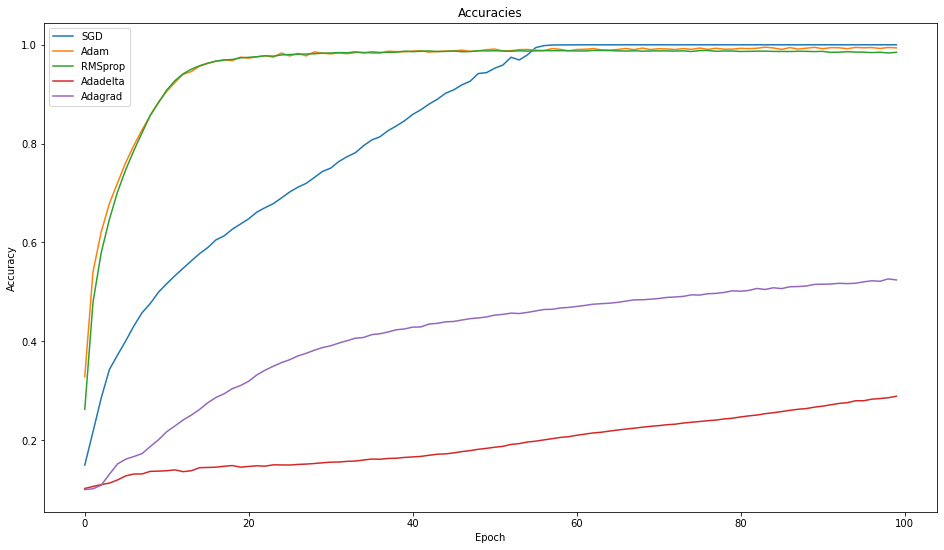

In [25]:
plt.plot(history_sgd_plain.history['accuracy'])
plt.plot(history_adam.history['accuracy'])
plt.plot(history_rmsprop.history['accuracy'])
plt.plot(history_adadelta.history['accuracy'])
plt.plot(history_adagrad.history['accuracy'])

plt.title('Accuracies')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['SGD', 'Adam', 'RMSprop', 'Adadelta', 'Adagrad'])
plt.savefig('Combined-Accuracy.jpg', dpi=200)

# Individuals

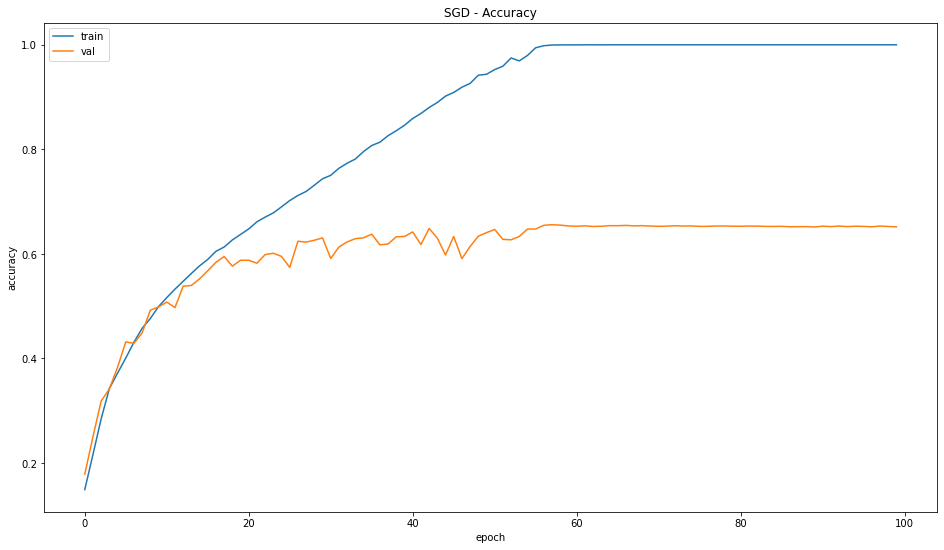

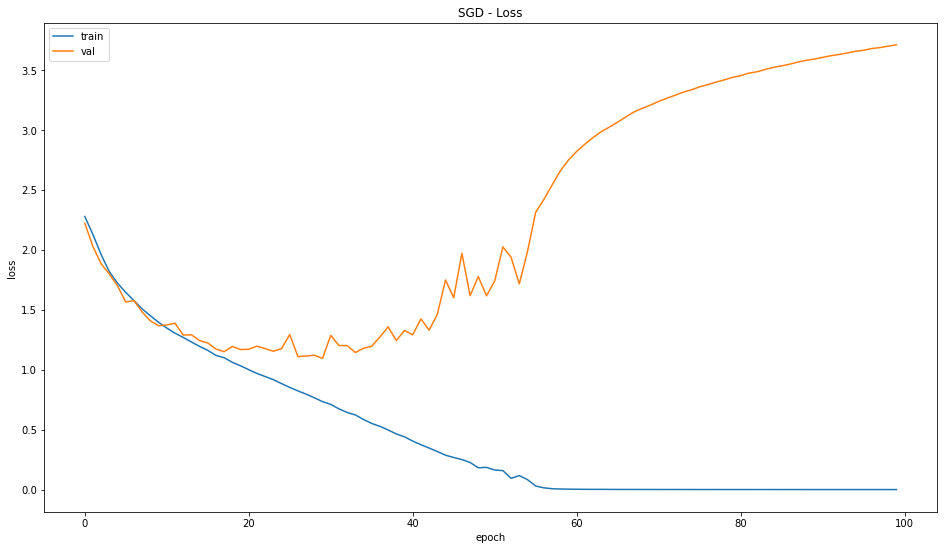

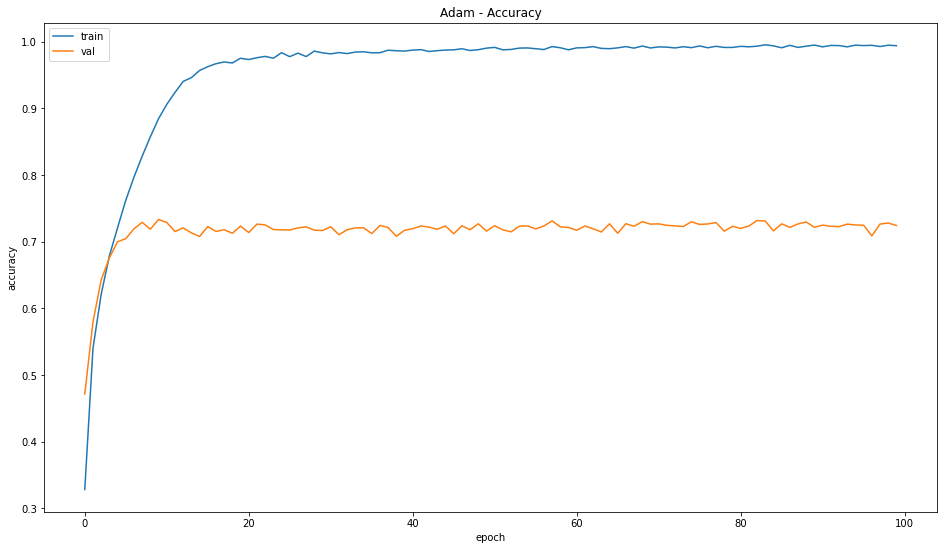

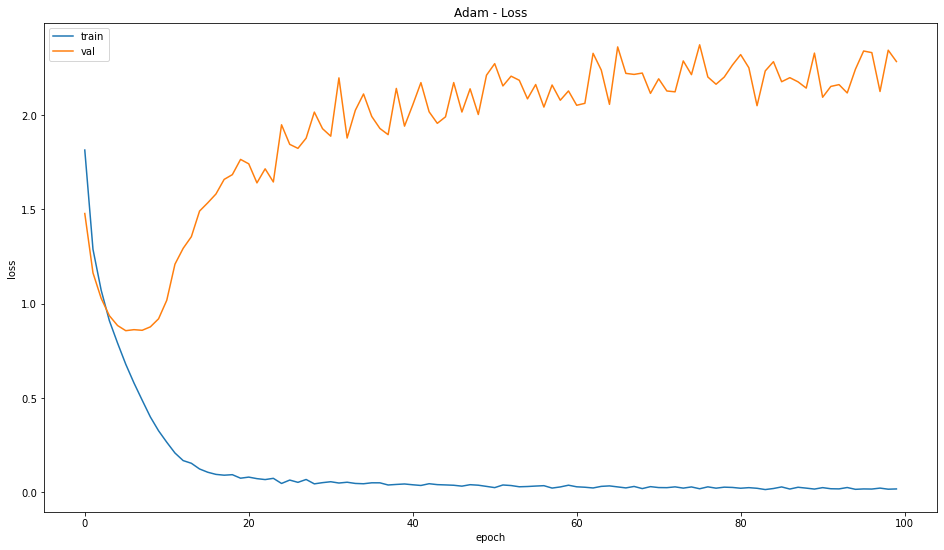

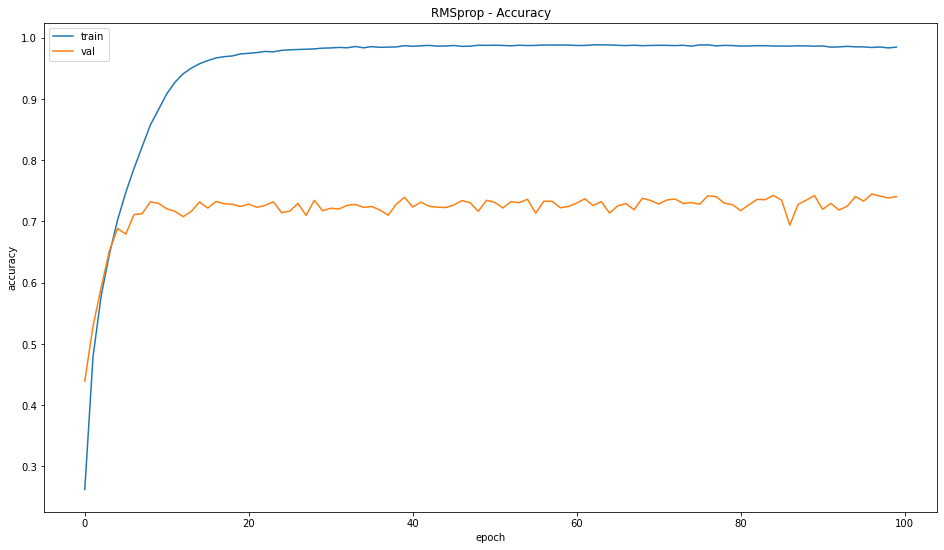

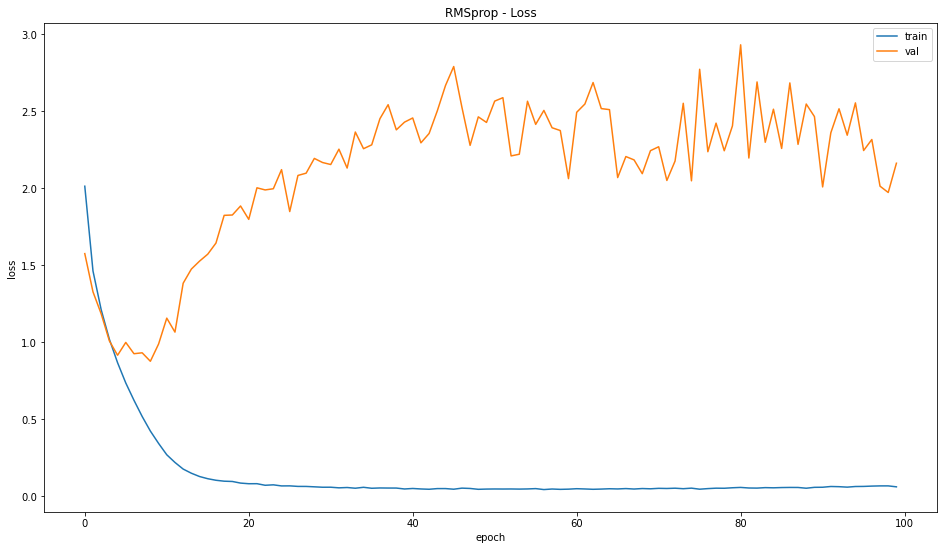

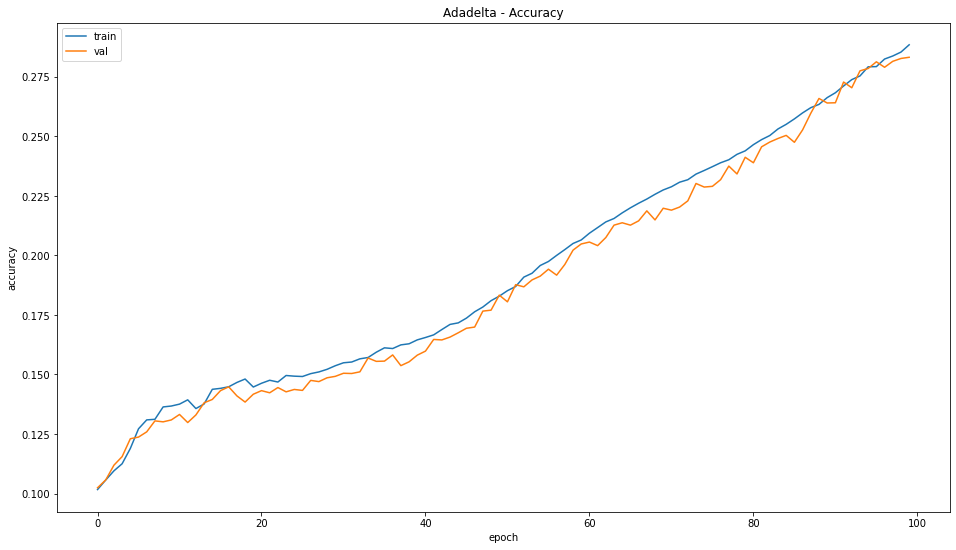

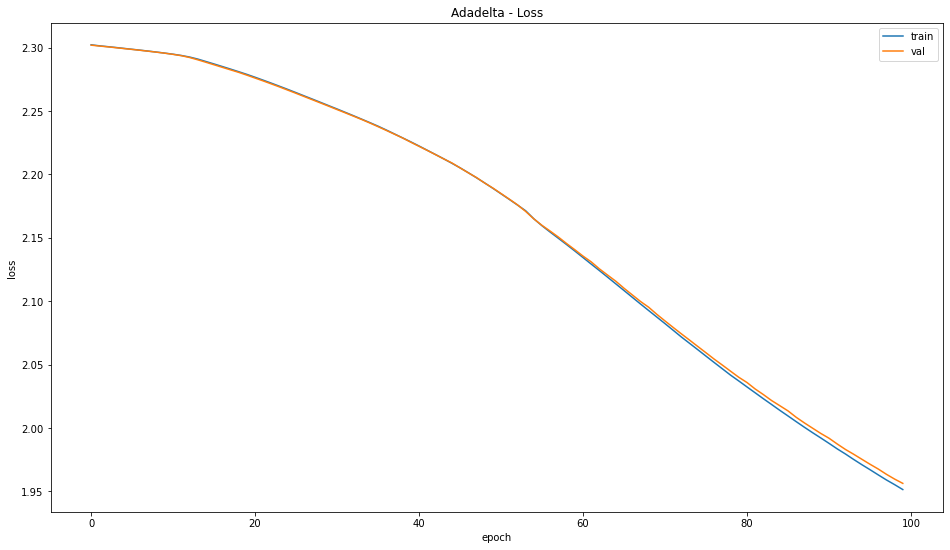

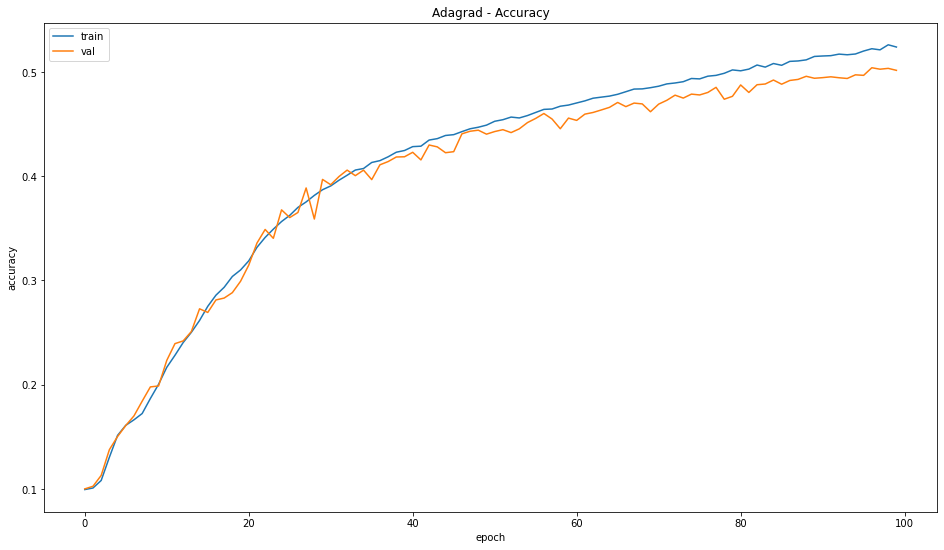

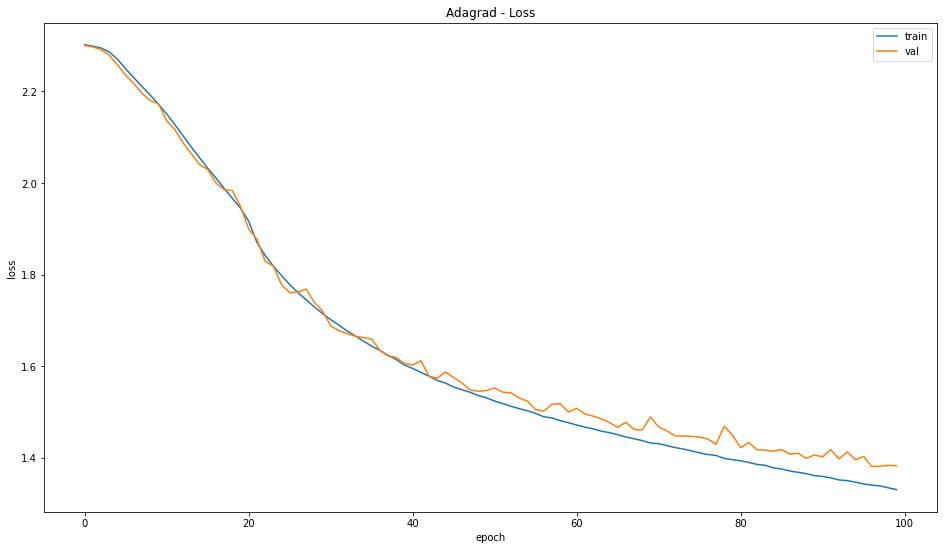

In [28]:
# SGD
plt.plot(history_sgd_plain.history['accuracy'])
plt.plot(history_sgd_plain.history['val_accuracy'])
plt.title('SGD - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('SGD-Accuracy.jpg')
plt.show()

print()
print()

plt.plot(history_sgd_plain.history['loss'])
plt.plot(history_sgd_plain.history['val_loss'])
plt.title('SGD - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('SGD-Loss.jpg')
plt.show()


# Adam
plt.plot(history_adam.history['accuracy'])
plt.plot(history_adam.history['val_accuracy'])
plt.title('Adam - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adam-Accuracy.jpg')
plt.show()

print()
print()

plt.plot(history_adam.history['loss'])
plt.plot(history_adam.history['val_loss'])
plt.title('Adam - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adam-Loss.jpg')
plt.show()

# RMSprop
plt.plot(history_rmsprop.history['accuracy'])
plt.plot(history_rmsprop.history['val_accuracy'])
plt.title('RMSprop - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('RMSprop-Accuracy.jpg')
plt.show()

print()
print()

plt.plot(history_rmsprop.history['loss'])
plt.plot(history_rmsprop.history['val_loss'])
plt.title('RMSprop - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('RMSprop-Loss.jpg')
plt.show()

# Adadelta
plt.plot(history_adadelta.history['accuracy'])
plt.plot(history_adadelta.history['val_accuracy'])
plt.title('Adadelta - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adadelta-Accuracy.jpg')
plt.show()

print()
print()

plt.plot(history_adadelta.history['loss'])
plt.plot(history_adadelta.history['val_loss'])
plt.title('Adadelta - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adadelta-Loss.jpg')
plt.show()

# Adagrad
plt.plot(history_adagrad.history['accuracy'])
plt.plot(history_adagrad.history['val_accuracy'])
plt.title('Adagrad - Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adagrad-Accuracy.jpg')
plt.show()

print()
print()

plt.plot(history_adagrad.history['loss'])
plt.plot(history_adagrad.history['val_loss'])
plt.title('Adagrad - Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.savefig('Adagrad-Loss.jpg')
plt.show()